In [2]:
import warnings
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm 

# from pandas_profilinag import ProfileReport

pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

In [3]:
FillList = [
    # "Revenue",
    "EMP",
    "Asset",
    "NPPE",
    "INTAN",
    "CapEx",
    "Age",
    "CapInten",
    "GMAR",
    "Leverage",
    "ENEConsume",
    "ENEProduce",
    "LTDebt",
    "GPPE",
    "AccuDep",
    "COGS",
    "EBIT",
    "EBITDA",
]

LogList = [
    "Revenue",
    "CapEx",
    "GPPE",
    "NPPE",
    "AccuDep",
    "INTAN",
    "COGS",
    "EMP",
    "Asset",
    "LTDebt",
    "CF1_merge",
    "CF2_merge",
    "CF3_merge",
    "CF123_merge",
    "ENEConsume",
    "ENEProduce",
    "EBIT",
    "EBITDA",
]

In [4]:
sector_classification = "GICSName" # "NAICSInd"

In [5]:
df_refinitiv = pd.read_parquet("../data/raw_data/CGEE_preprocessed_dataset_2023.parquet")
df_refinitiv["Age"] = df_refinitiv["GPPE"] / (df_refinitiv["EBITDA"] - df_refinitiv["EBIT"])
df_refinitiv["Age"] = df_refinitiv["Age"].replace(np.inf, np.nan)

df_refinitiv["CapInten"] = df_refinitiv["NPPE"] / df_refinitiv["Revenue"]
df_refinitiv["CapInten"] = df_refinitiv["CapInten"].replace(np.inf, np.nan)

df_refinitiv["Leverage"] = df_refinitiv["LTDebt"] / df_refinitiv["Asset"]
df_refinitiv["Leverage"] = df_refinitiv["Leverage"].replace(np.inf, np.nan)
print(df_refinitiv.shape)
df_refinitiv[:2]

(596977, 67)


,FinalEikonID,Name,ISIN,Ticker,CountryHQ,NAICSSector,NAICSInd,GICSSector,GICSGroup,GICSInd,GICSSubInd,GICSName,FiscalYear,ref_CF1,ref_CF2,ref_CF3,ref_CF123,Revenue,EBITDA,EBIT,CapEx,GPPE,NPPE,AccuDep,INTAN,...,CO2Law,CO2Scheme,CO2Status,CO2Coverage,StartYear,Status,Price,Area,Year,FuelIntensity,IncomeGroup,CDP_CF1,CDP_CF2_location,CDP_CF2_market,CDP_CF3,CDP_CF123,boundary,covered_countries,Age,CapInten,Leverage,CF1_merge,CF2_merge,CF3_merge,CF123_merge
0,AIAS.CY,Aias Investment Public Ltd,CY0005200213,AIAS,Cyprus,52,525990,40.0,4020.0,402030.0,40203010.0,Asset Management & Custody Banks,2018,NaN,NaN,NaN,NaN,89721.534086,-30576.199651,-54179.282503,NaN,NaN,NaN,NaN,9496.284063,...,Yes,ETS,Implemented,Regional,2005.0,Yes,NaN,Cyprus,2018.0,638.34,H,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,AIAS.CY,Aias Investment Public Ltd,CY0005200213,AIAS,Cyprus,52,525990,40.0,4020.0,402030.0,40203010.0,Asset Management & Custody Banks,2016,NaN,NaN,NaN,NaN,168523.969722,77270.815812,68566.021867,NaN,NaN,NaN,NaN,NaN,...,Yes,ETS,Implemented,Regional,2005.0,Yes,NaN,Cyprus,2016.0,642.13,H,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
df_refinitiv[df_refinitiv.duplicated(subset = ["FiscalYear", "FinalEikonID"])]

,FinalEikonID,Name,ISIN,Ticker,CountryHQ,NAICSSector,NAICSInd,GICSSector,GICSGroup,GICSInd,GICSSubInd,GICSName,FiscalYear,ref_CF1,ref_CF2,ref_CF3,ref_CF123,Revenue,EBITDA,EBIT,CapEx,GPPE,NPPE,AccuDep,INTAN,...,CO2Law,CO2Scheme,CO2Status,CO2Coverage,StartYear,Status,Price,Area,Year,FuelIntensity,IncomeGroup,CDP_CF1,CDP_CF2_location,CDP_CF2_market,CDP_CF3,CDP_CF123,boundary,covered_countries,Age,CapInten,Leverage,CF1_merge,CF2_merge,CF3_merge,CF123_merge


In [7]:
mapping = pd.read_excel('../data/raw_data/' + "country_region_mapping.xlsx")
mapping_dict = mapping.set_index("Country").to_dict()["Region"]
df_refinitiv["Region"] = df_refinitiv["CountryHQ"].apply(lambda x: mapping_dict[x])

In [8]:
sorter = df_refinitiv.FinalEikonID.value_counts().index
df_refinitiv["sorter"] = df_refinitiv.FinalEikonID.astype("category").cat.set_categories(sorter)

In [9]:
df_refinitiv_filtered = df_refinitiv[df_refinitiv.FiscalYear>2010]
df_refinitiv_filtered = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification].notna()]
# df_refinitiv_filtered = df_refinitiv_filtered[(df_refinitiv_filtered.CF1_merge>0) | (df_refinitiv_filtered.CF2_merge>0) | (df_refinitiv_filtered.CF3_merge>0)]
df_refinitiv_filtered = df_refinitiv_filtered[(df_refinitiv_filtered.CF1_merge>0) & (df_refinitiv_filtered.CF2_merge>0) & (df_refinitiv_filtered.CF3_merge>0)]
df_refinitiv_filtered.shape

(19010, 68)

In [10]:
lst_sectors = df_refinitiv_filtered[sector_classification].unique()
lst_countries = df_refinitiv_filtered.CountryHQ.unique()
lst_companies = df_refinitiv_filtered.FinalEikonID.unique()
companies_per_countries = df_refinitiv_filtered.drop_duplicates("FinalEikonID").CountryHQ.value_counts()


In [11]:
df_refinitiv_filtered.drop_duplicates("FinalEikonID")[sector_classification].value_counts()


Packaged Foods & Meats                          117
Construction & Engineering                      101
Industrial Machinery & Supplies & Components     90
IT Consulting & Other Services                   78
Automotive Parts & Equipment                     77
                                               ... 
Hotel & Resort REITs                              3
Security & Alarm Services                         3
Telecom Tower REITs                               2
Timber REITs                                      2
Silver                                            1
Name: GICSName, Length: 162, dtype: Int64

In [12]:
df_refinitiv_filtered_soft = df_refinitiv[(df_refinitiv.CF1_merge>0) | (df_refinitiv.CF2_merge>0) | (df_refinitiv.CF3_merge>0)]

In [14]:
df_refinitiv_filtered.CountryHQ.nunique()

75

In [20]:
np.random.seed = 1
seed = 1
max_taken_subsector = 20
max_taken_country = 50
min_remove_sector = 5
percent_taken = 50
df_refinitiv_filtered = df_refinitiv[df_refinitiv.FiscalYear>2010]
df_refinitiv_filtered = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification].notna()]
# df_refinitiv_filtered = df_refinitiv_filtered[(df_refinitiv_filtered.CF1_merge>0) | (df_refinitiv_filtered.CF2_merge>0) | (df_refinitiv_filtered.CF3_merge>0)]
df_refinitiv_filtered = df_refinitiv_filtered[(df_refinitiv_filtered.CF1_merge>0) & (df_refinitiv_filtered.CF2_merge>0) & (df_refinitiv_filtered.CF3_merge>0)]
sorter = df_refinitiv_filtered.FinalEikonID.value_counts().index
df_refinitiv_filtered["sorter"] = df_refinitiv_filtered.FinalEikonID.astype("category").cat.set_categories(sorter)

df_refinitiv_filtered.shape

(19010, 68)

In [21]:
df_company_test = []
verbose = True

df_refinitiv_filtered = df_refinitiv_filtered.sample(frac=1, random_state=seed)

# Sector based selection
lst_industry_solo = []
for sector in lst_sectors : 
    candidates = df_refinitiv_filtered[df_refinitiv_filtered[sector_classification] == sector].FinalEikonID.unique()
    rd.Random(seed).shuffle(candidates)
    if len(candidates) > 2 * max_taken_subsector : 
        # take up to max_taken_subsector companies
        df_company_test = df_company_test + candidates[:max_taken_subsector].tolist()
    elif len(candidates) > 1 : 
        # take half of available companies in test (and left the other half for train), up to max_taken_subsector
        df_company_test = df_company_test + candidates[:int((len(candidates))/(100/percent_taken))].tolist()
    # else : # only one company 
    #     lst_industry_solo.append(sector)

df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.FinalEikonID.isin(df_company_test)]
if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID")[sector_classification].nunique())
    print('\n')


# Country based selection
lst_country_solo = []
for country in lst_countries:
    if not(country in df_refinitiv_filtered_test.CountryHQ.tolist()) : 
        if companies_per_countries[country] == 1 : 
            lst_country_solo.append(country)
        else : 
            candidates = df_refinitiv_filtered[df_refinitiv_filtered.CountryHQ == country].FinalEikonID.unique()
            rd.Random(seed).shuffle(candidates)
            df_company_test = df_company_test + candidates[:int((len(candidates)+0.5)/(100/percent_taken))].tolist()

if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID")[sector_classification].nunique())
    print('\n')

candidates_solo = df_refinitiv_filtered[df_refinitiv_filtered.CountryHQ.isin(lst_country_solo)].FinalEikonID.unique()
rd.Random(seed).shuffle(np.array(candidates_solo))
df_company_test = df_company_test + candidates_solo[:int((len(candidates_solo)+0.5)/(100/percent_taken))].tolist()

df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.FinalEikonID.isin(df_company_test)]
if verbose : 
    print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").CountryHQ.nunique())
    print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID")[sector_classification].nunique())
    print('\n')

country_repartition = df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").CountryHQ.value_counts()
current_sector_repartition = df_refinitiv_filtered_test.drop_duplicates("FinalEikonID")[sector_classification].value_counts()

# Country based removal
df_refinitiv_filtered_test = df_refinitiv_filtered_test.sort_values(["sorter"], ascending=False) 
for country in country_repartition[country_repartition > max_taken_country].index:
    # print(country)
    candidates_to_remove = df_refinitiv_filtered_test.drop_duplicates("FinalEikonID")[df_refinitiv_filtered_test.CountryHQ==country].FinalEikonID
    # print("count_ini :",len(candidates_to_remove))
    # rd.Random(seed).shuffle(np.array(candidates_to_remove))
    count_removed = 0
    count_to_removed = len(candidates_to_remove) - max_taken_country
    for company in candidates_to_remove : 
        company_sector = df_refinitiv_filtered_test[df_refinitiv_filtered_test.FinalEikonID==company][sector_classification].values[0]
        if current_sector_repartition[company_sector] > min_remove_sector and count_removed < count_to_removed: 
            current_sector_repartition.loc[company_sector] = current_sector_repartition.loc[company_sector] - 1
            df_company_test.remove(company)
            count_removed+=1
    # print("count_removed : ",count_removed)


df_refinitiv_filtered_test = df_refinitiv_filtered[df_refinitiv_filtered.FinalEikonID.isin(df_company_test)]
df_refinitiv_filtered_train = df_refinitiv_filtered[~(df_refinitiv_filtered.FinalEikonID.isin(df_company_test))]
print("\n")
print("train")
print("nb countries :",df_refinitiv_filtered_train.drop_duplicates("FinalEikonID").CountryHQ.nunique())
print("nb sectors :",df_refinitiv_filtered_train.drop_duplicates("FinalEikonID")[sector_classification].nunique())
print("\n")
print("test")
print("nb countries :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").CountryHQ.nunique())
print("nb sectors :",df_refinitiv_filtered_test.drop_duplicates("FinalEikonID")[sector_classification].nunique())


nb countries : 63
nb sectors : 161


nb countries : 63
nb sectors : 161


nb countries : 70
nb sectors : 161




train
nb countries : 63
nb sectors : 162


test
nb countries : 70
nb sectors : 161


In [22]:
df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").shape

(1128, 68)

In [58]:
percent_data_taken =  (df_refinitiv_filtered_test.shape[0]) / df_refinitiv_filtered.shape[0]
percent_comapny_taken =  (df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").shape[0]) / df_refinitiv_filtered.drop_duplicates("FinalEikonID").shape[0]
print("percent_data_taken (companies scope 1&2&3): ", percent_data_taken, " %")
print("percent_company_taken (companies scope 1&2&3): ", percent_comapny_taken, " %")

percent_data_taken =  (df_refinitiv_filtered_test.shape[0]) / df_refinitiv_filtered_soft.shape[0]
percent_comapny_taken =  (df_refinitiv_filtered_test.drop_duplicates("FinalEikonID").shape[0]) / df_refinitiv_filtered_soft.drop_duplicates("FinalEikonID").shape[0]
print("percent_data_taken (companies scope 1 or 2 or 3): ", percent_data_taken, " %")
print("percent_company_taken (companies scope 1 or 2 or 3): ", percent_comapny_taken, " %")

percent_data_taken (companies scope 1&2&3):  0.2853761178327196  %
percent_company_taken (companies scope 1&2&3):  0.2838758516275549  %
percent_data_taken (companies scope 1 or 2 or 3):  0.1521909891712955  %
percent_company_taken (companies scope 1 or 2 or 3):  0.173798856789742  %


In [59]:
df_refinitiv_filtered_test.FiscalYear.value_counts()

2021    949
2020    773
2019    610
2022    507
2018    470
2017    393
2016    372
2015    343
2014    314
2012    252
2011    225
2013    217
Name: FiscalYear, dtype: int64

In [60]:
df_refinitiv_filtered_test.FiscalYear.value_counts()/len(df_refinitiv_filtered_test)*100 - df_refinitiv_filtered_train.FiscalYear.value_counts()/len(df_refinitiv_filtered_train)*100 
# same years repartion , test a bit significantly more recent than the train 

2011    0.673045
2012    0.574495
2013    0.555024
2014    0.480694
2015    0.006791
2016   -0.187392
2017   -0.867648
2018   -0.611341
2019   -0.717483
2020   -0.561605
2021   -0.085124
2022    0.740543
Name: FiscalYear, dtype: float64

In [61]:
df_refinitiv_filtered_test.Asset.min()

19267536.0124782

In [62]:
df_refinitiv_filtered_train.Asset.min()

10190846.4634063

In [63]:
print("Columns for which the min is in test : ") # Seems better 
(df_refinitiv_filtered_train[LogList[:-7]].min() > df_refinitiv_filtered_test[LogList[:-7]].min()) 


Columns for which the min is in test : 


Revenue      False
CapEx        False
GPPE         False
NPPE         False
AccuDep      False
INTAN        False
COGS         False
EMP          False
Asset        False
LTDebt       False
CF1_merge    False
dtype: bool

In [64]:
df_refinitiv_filtered_test[FillList].mean()/df_refinitiv_filtered_train[FillList].mean() 
# gross diff pour la majorité des indicateurs financiers

EMP           1.004779
Asset         0.917453
NPPE          0.995883
INTAN         0.814726
CapEx         0.943073
Age           0.954692
CapInten      0.844208
GMAR          1.037776
Leverage      0.976728
ENEConsume    0.953741
ENEProduce    0.277778
LTDebt        0.823262
GPPE          1.012744
AccuDep       1.059808
COGS          0.978099
EBIT          0.832636
EBITDA        0.890909
dtype: float64

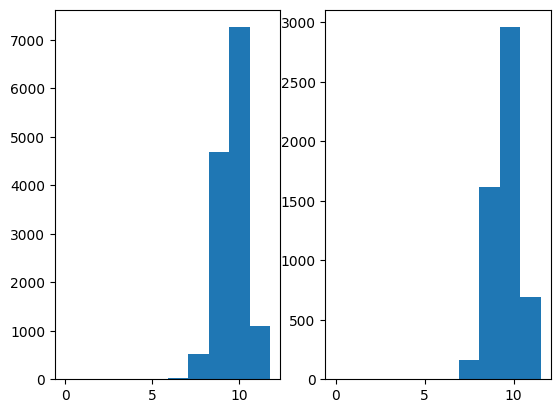

In [65]:
_, axs = plt.subplots(1, 2)
axs[0].hist(np.log10(df_refinitiv_filtered_train.Revenue - df_refinitiv_filtered_train.Revenue.min() + 1))
axs[1].hist(np.log10(df_refinitiv_filtered_test.Revenue - df_refinitiv_filtered_test.Revenue.min() + 1))
plt.show()

In [66]:
df_refinitiv_filtered.drop_duplicates("Name").Region.value_counts() / len(df_refinitiv_filtered.drop_duplicates("Name")) * 100

Europe and Central Asia          37.042644
East Asia and Pacific            30.381024
North America                    21.826899
Latin America & the Caribbean     4.642947
South Asia                        2.977542
Sub-Saharan Africa                2.245773
Middle East and North Africa      0.883169
Name: Region, dtype: float64

In [67]:
df_refinitiv_filtered_test.drop_duplicates("Name").Region.value_counts() / len(df_refinitiv_filtered_test.drop_duplicates("Name")) * 100
# lower importance of north america and more of others

Europe and Central Asia          41.333333
East Asia and Pacific            32.177778
North America                    10.044444
Latin America & the Caribbean     7.377778
South Asia                        4.444444
Sub-Saharan Africa                3.022222
Middle East and North Africa      1.600000
Name: Region, dtype: float64

In [68]:
df_refinitiv_filtered_train.drop_duplicates("Name").Region.value_counts() / len(df_refinitiv_filtered_train.drop_duplicates("Name")) * 100

Europe and Central Asia          35.341790
East Asia and Pacific            29.668781
North America                    26.497533
Latin America & the Caribbean     3.558844
South Asia                        2.396054
Sub-Saharan Africa                1.937984
Middle East and North Africa      0.599013
Name: Region, dtype: float64

In [69]:
df_refinitiv_filtered.CountryHQ.value_counts()/len(df_refinitiv_filtered)*100
# 40 % des données sont issues de 3 pays, d'où l'intérêt de l'exercice

United States of America    19.579169
Japan                       11.588638
United Kingdom              10.941610
France                       4.229353
Germany                      3.924250
                              ...    
Estonia                      0.010521
Ukraine                      0.010521
Vietnam                      0.005260
Uganda                       0.005260
Cambodia                     0.005260
Name: CountryHQ, Length: 75, dtype: float64

In [70]:
df_refinitiv_filtered_train.CountryHQ.value_counts()/len(df_refinitiv_filtered_train)*100

United States of America    25.513434
Japan                       13.875598
United Kingdom              12.521163
France                       3.761502
Sweden                       3.268311
                              ...    
Slovenia                     0.014722
Vietnam                      0.007361
Bahrain                      0.007361
Uganda                       0.007361
Uruguay                      0.007361
Name: CountryHQ, Length: 66, dtype: float64

In [72]:
(df_refinitiv_filtered_test.CountryHQ.value_counts()/len(df_refinitiv_filtered_test)*100) # US underrepresented since 

United Kingdom    6.986175
Japan             5.861751
Germany           5.824885
France            5.400922
Australia         5.013825
                    ...   
Estonia           0.036866
Isle of Man       0.036866
Cambodia          0.018433
Bahrain           0.018433
Egypt             0.018433
Name: CountryHQ, Length: 67, dtype: float64

In [74]:
df_refinitiv_filtered_test.drop_duplicates("Name").GICSName.value_counts() / len(df_refinitiv_filtered_test.drop_duplicates("Name")) * 100
# Less imbalanced repartition of sectors

Integrated Telecommunication Services    1.688889
Real Estate Development                       1.6
Real Estate Operating Companies               1.6
Industrial Conglomerates                 1.511111
Renewable Electricity                    1.422222
                                           ...   
Security & Alarm Services                0.088889
Hotel & Resort REITs                     0.088889
Single-Family Residential REITs          0.088889
Other Specialized REITs                  0.088889
Telecom Tower REITs                      0.088889
Name: GICSName, Length: 161, dtype: Float64

In [75]:
df_refinitiv_filtered_train.drop_duplicates("Name").GICSName.value_counts() / len(df_refinitiv_filtered_train.drop_duplicates("Name")) * 100

Packaged Foods & Meats                          3.629316
Construction & Engineering                      3.100775
Industrial Machinery & Supplies & Components    2.818887
Automotive Parts & Equipment                    2.360817
IT Consulting & Other Services                  2.290345
                                                  ...   
Diversified Capital Markets                     0.070472
Other Specialized REITs                         0.070472
Silver                                          0.035236
Telecom Tower REITs                             0.035236
Timber REITs                                    0.035236
Name: GICSName, Length: 162, dtype: Float64

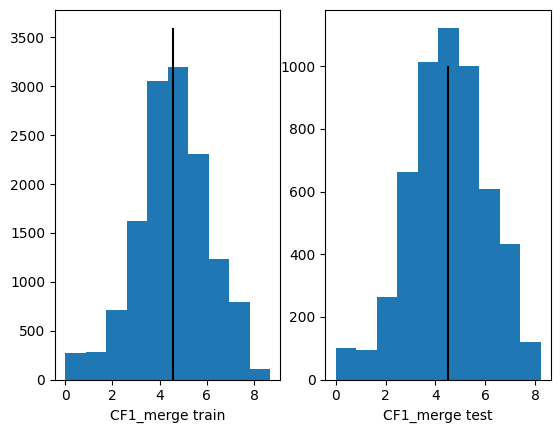

In [76]:
_, axs = plt.subplots(1, 2)
col = "CF1_merge"
axs[0].hist(np.log10(df_refinitiv_filtered_train[col] - df_refinitiv_filtered_train[col].min() + 1))
axs[1].hist(np.log10(df_refinitiv_filtered_test[col]  - df_refinitiv_filtered_test[col].min() + 1))
axs[0].set_xlabel(col + " train")
axs[1].set_xlabel(col + " test")
axs[0].vlines(np.mean(np.log10(df_refinitiv_filtered_train[col] - df_refinitiv_filtered_train[col].min() + 1)),0,3600, color="black")
axs[1].vlines(np.mean(np.log10(df_refinitiv_filtered_test[col] - df_refinitiv_filtered_test[col].min() + 1)),0,1000, color="black")

plt.show()

In [77]:
scope = "CF3_merge"
a = df_refinitiv_filtered_test[scope].quantile([0.01]+[i/10 for i in range(1,10)]+[0.99])
b = df_refinitiv_filtered_train[scope].quantile([0.01]+[i/10 for i in range(1,10)]+[0.99])
a/b

0.01    2.272727
0.10    0.814876
0.20    0.738357
0.30    0.684930
0.40    0.655315
0.50    0.636803
0.60    0.634148
0.70    0.606479
0.80    0.725594
0.90    1.050069
0.99    1.173063
Name: CF3_merge, dtype: float64

In [78]:
df_refinitiv_filtered_test.Name.drop_duplicates().to_csv("lst_companies_test_GICS_2023.csv",index=False)

In [23]:
df_refinitiv_filtered_test = pd.read_csv("lst_companies_test_GICS_2023.csv")

In [27]:
df_refinitiv_filtered.Name.nunique()

3963